In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (country-level COVID-19 data)
df = pd.read_csv('covid_data.csv')
# Preview data
df.head()
# Show columns and basic info
print(df.columns)
print(df.shape)
# Check for missing values in each column
df.isnull().sum()




In [3]:
# Filter for specific countries of interest
countries = ['USA', 'India', 'Kenya']
df_countries = df[df['country'].isin(countries)].copy()

# Fill missing values (e.g., replace NaN with 0 for simplicity)
df.fillna(0, inplace=True)


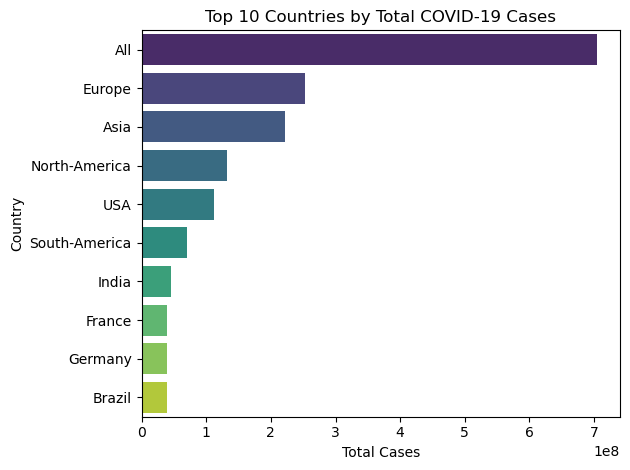

In [4]:
# Top 10 countries by total cases
top_cases = df.nlargest(10, 'total_cases')
sns.barplot(x='total_cases', y='country', data=top_cases, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


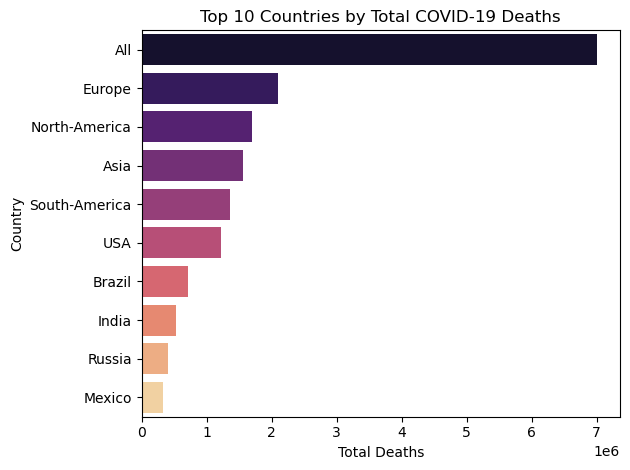

In [5]:
# Top 10 countries by total deaths
top_deaths = df.nlargest(10, 'total_deaths')
sns.barplot(x='total_deaths', y='country', data=top_deaths, palette='magma')
plt.title('Top 10 Countries by Total COVID-19 Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


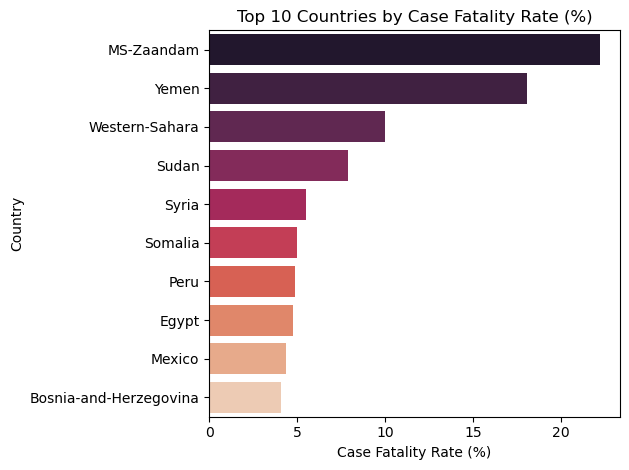

In [6]:
# Calculate case fatality rate (%)
df['death_rate'] = df['total_deaths'] / df['total_cases'] * 100
# Replace inf or NaN if any
df['death_rate'].replace([float('inf'), float('nan')], 0, inplace=True)

# Top 10 countries by case fatality rate
top_cfr = df.nlargest(10, 'death_rate')
sns.barplot(x='death_rate', y='country', data=top_cfr, palette='rocket')
plt.title('Top 10 Countries by Case Fatality Rate (%)')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


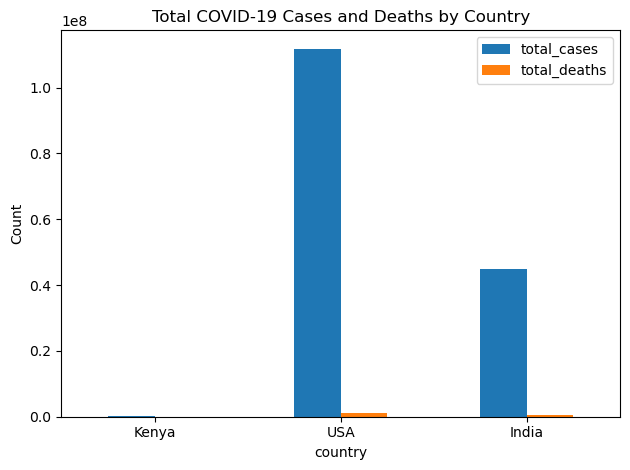

In [7]:
# Total cases vs deaths for selected countries
df_countries.set_index('country')[['total_cases', 'total_deaths']].plot(kind='bar')
plt.title('Total COVID-19 Cases and Deaths by Country')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


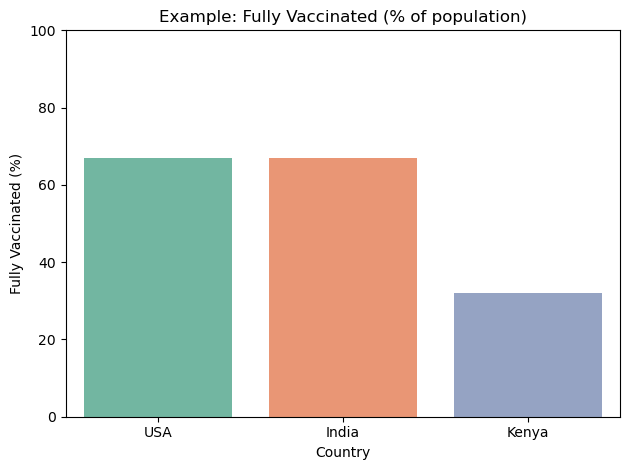

In [8]:
# Example vaccination rates (percent of population fully vaccinated)
vax_data = pd.DataFrame({
    'country': ['USA', 'India', 'Kenya'],
    'fully_vaccinated_pct': [67.0, 67.0, 32.0]  # Example values
})

sns.barplot(x='country', y='fully_vaccinated_pct', data=vax_data, palette='Set2')
plt.title('Example: Fully Vaccinated (% of population)')
plt.ylabel('Fully Vaccinated (%)')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


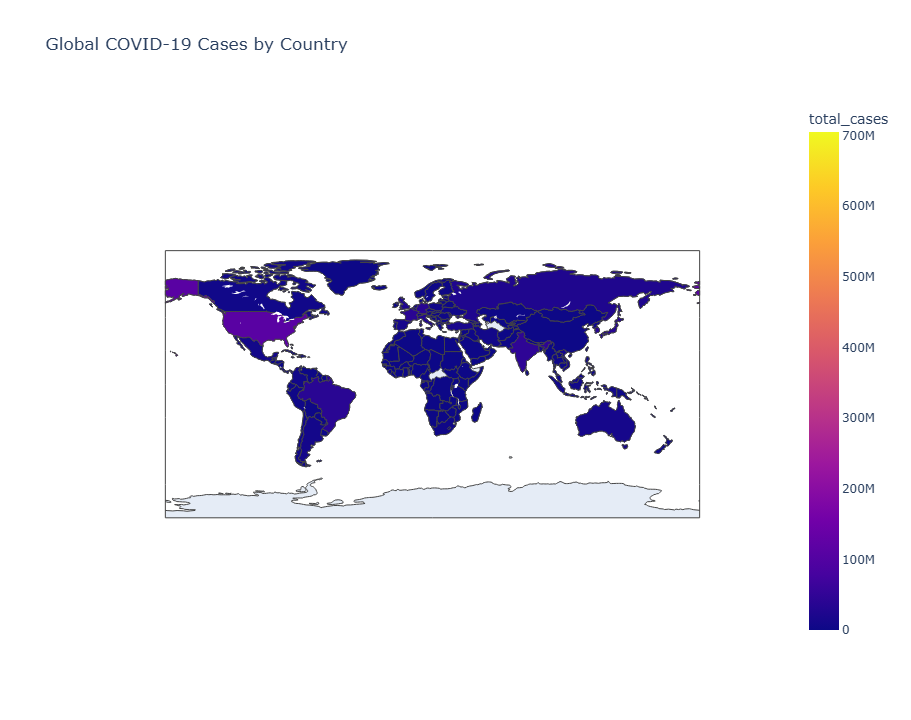

In [10]:
import plotly.express as px

fig = px.choropleth(df, locations='country', locationmode='country names', 
                    color='total_cases', title='Global COVID-19 Cases by Country')
fig.show()
This map highlights how case counts vary globally. (In static form, it would color countries by their total cases.)